<a href="https://colab.research.google.com/github/yiuchungcheung/Dubstech/blob/master/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Analysis Using Online Electronic Store Data
## ----------------------------------------------------------------------------

In [0]:
import os 
import pandas as pd

## 1) Import the data

In [27]:
files = [file for file in os.listdir('./dubstech') if not file.startswith('.')]
files

['Sales_October_2019.csv',
 'Sales_August_2019.csv',
 'Sales_March_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_April_2019.csv',
 'Sales_November_2019.csv',
 'Sales_June_2019.csv',
 'Sales_December_2019.csv',
 'Sales_May_2019.csv',
 'Sales_July_2019.csv',
 'Sales_September_2019.csv']

In [0]:
data = pd.DataFrame() 

for file in files: 
  temp = pd.read_csv('./dubstech/' + file)
  data = pd.concat([data, temp])

In [29]:
data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"
5,259363,AAA Batteries (4-pack),1,2.99,10/01/19 18:55,"976 Lake St, New York City, NY 10001"
6,259364,Wired Headphones,1,11.99,10/29/19 11:02,"874 North St, Los Angeles, CA 90001"
7,259365,Lightning Charging Cable,1,14.95,10/29/19 11:19,"127 12th St, Los Angeles, CA 90001"
8,259366,Apple Airpods Headphones,1,150.0,10/20/19 11:52,"955 9th St, Los Angeles, CA 90001"
9,259367,Apple Airpods Headphones,1,150.0,10/16/19 16:19,"742 14th St, San Francisco, CA 94016"


In [30]:
data.shape

(186850, 6)

In [31]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

## 2) Clean the Data
##### a) Drop NaN values from the data

In [32]:
data[data.isna().any(axis = 1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
282,NaN,NaN,NaN,NaN,NaN,NaN
509,NaN,NaN,NaN,NaN,NaN,NaN
838,NaN,NaN,NaN,NaN,NaN,NaN
888,NaN,NaN,NaN,NaN,NaN,NaN
1169,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
data = data.dropna(how='all')
data.shape

(186305, 6)

##### b) Clean tuples with column names as their entry

In [0]:
data = data[data['Order Date'] != 'Order Date']

##### c) Convert the columns to the correct data type

In [44]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])

data['Price Each'] = pd.to_numeric(data['Price Each'])

data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
dtype: object

## 3) Augmentation of the data 
##### a) Add a month column with the numeric value of the month

In [41]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Month'] = data['Order Date'].dt.month
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001",10
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001",10
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001",10
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001",10
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001",10


##### b) Add a city column with state notation

In [62]:
#609 Cherry St, Dallas, TX 75001
def getCity(address):
    return address.split(',')[1]

def getState(address):
  return address.split(',')[2].split(' ')[1]

data['City'] = data['Purchase Address'].apply(lambda x: getCity(x) + ' (' + getState(x) + ')')
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001",10,379.99,Dallas (TX)
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001",10,389.99,Los Angeles (CA)
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001",10,5.98,New York City (NY)
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001",10,149.99,New York City (NY)
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001",10,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


##### c) Add hours column

In [70]:
data['Hour'] = data['Order Date'].dt.hour
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001",10,379.99,Dallas (TX),10
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001",10,389.99,Los Angeles (CA),17
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001",10,5.98,New York City (NY),17
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001",10,149.99,New York City (NY),22
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001",10,11.99,Los Angeles (CA),16


## 4) Explore the data!!
#### Qa) Find out the best month for sales and the total amount earned that month.

In [46]:
data['Sales'] = data['Quantity Ordered'] * data['Price Each']
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001",10,379.99
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001",10,389.99
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001",10,5.98
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001",10,149.99
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001",10,11.99


In [51]:
resulta = data.groupby('Month')['Sales'].sum()
resulta

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

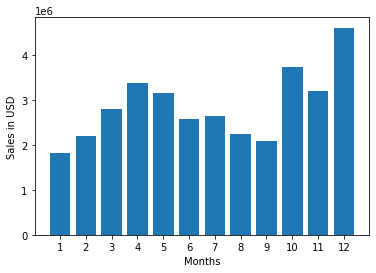

In [57]:
import matplotlib.pyplot as plt

months = data['Month'].unique()
months.sort()

plt.bar(months, resulta)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()

##### Qb) Find out the city which sold the most number of products.

In [64]:
resultb = data.groupby('City')['Sales'].sum()
resultb

City
 Atlanta (GA)          2.795499e+06
 Austin (TX)           1.819582e+06
 Boston (MA)           3.661642e+06
 Dallas (TX)           2.767975e+06
 Los Angeles (CA)      5.452571e+06
 New York City (NY)    4.664317e+06
 Portland (ME)         4.497583e+05
 Portland (OR)         1.870732e+06
 San Francisco (CA)    8.262204e+06
 Seattle (WA)          2.747755e+06
Name: Sales, dtype: float64

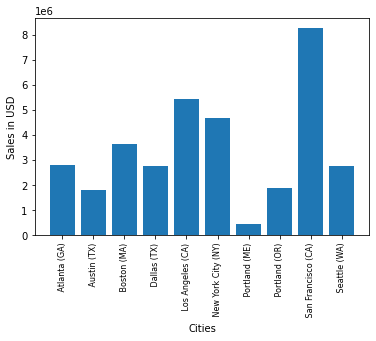

In [68]:
cities = data['City'].unique()
cities.sort()

plt.bar(cities, resultb)
plt.xticks(cities, rotation = 90, size = 8)
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.show()

##### Qc) Find out the best time to display advertisements for maximum customer engagement.

In [71]:
resultc = data.groupby('Hour').count()
resultc

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
Hour,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256


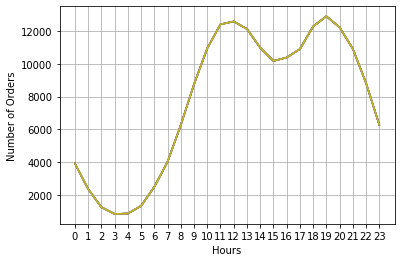

In [82]:
hours = data['Hour'].unique()
hours.sort()

plt.plot(hours, resultc)
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

##### Qd) Find the pair of products that are often sold together.

In [91]:
resultd = data[data['Order ID'].duplicated(keep=False)]
resultd['Grouped'] = resultd.groupby('Order ID')['Product'].transform(lambda x: (', ').join(x))

resultd = resultd[['Order ID', 'Grouped']].drop_duplicates()
resultd

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Grouped
62,259420,"Google Phone, USB-C Charging Cable"
65,259422,"Google Phone, USB-C Charging Cable"
82,259438,"iPhone, Lightning Charging Cable"
103,259458,"34in Ultrawide Monitor, ThinkPad Laptop"
123,259477,"LG Dryer, AAA Batteries (4-pack)"
...,...,...
11617,259296,"Apple Airpods Headphones, Apple Airpods Headph..."
11619,259297,"iPhone, Lightning Charging Cable, Lightning Ch..."
11627,259303,"34in Ultrawide Monitor, AA Batteries (4-pack)"
11639,259314,"Wired Headphones, AAA Batteries (4-pack)"


In [99]:
from itertools import combinations
from collections import Counter

count = Counter()

for products in resultd['Grouped']:
  product_list = products.split(', ')
  # value 2 is to filter out only paired products
  count.update(Counter(combinations(product_list, 2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]